<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-Python/blob/main/EXAMPLE_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title: Exercise 2.3 

Name: Juan Manuel G.G

Date: February 15

### 1. Process description 

Two tanks are connected together and we want to determine the dinamics of the process to find how h1, h2, w2 and w3 change with the inputs 

### 2. Assumptions 

* Constant density 
* Constant temperature 
* Constant resitences 

### 3. Scheme of the process 

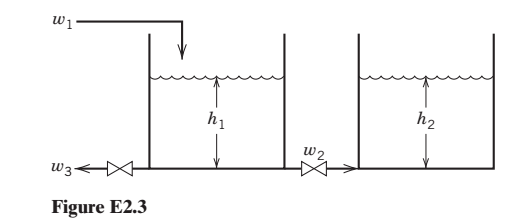

### 4. Analysis 



#### Establish the model 

Mass balance in tank 1 

$$
\frac{d(\rho V_1)}{dt} = w_1 - w_2 - w_3
$$

$$
\rho A_1 \frac{dh_1}{dt} = w_1 - \frac{h_1 - h_2}{R_2} - \frac{h_1}{R_2}\tag{1}
$$

Mass balance tank 2

$$
\frac{d(\rho V_2)}{dt} = w_2 
$$

$$
\rho A_2 \frac{dh_2}{dt} = \frac{h_1 - h_2}{R_2} \tag{2}
$$

#### Steady state 

Equating (1) and (2) to zero we get 

$$
w_1 - \frac{h_1 - h_2}{R_2} -  \frac{h_1}{R_3} = 0 \tag{3}
$$

$$
h_1 - h_2 = 0 \tag{4}
$$

Solving (3) and (4) we have 

$$
h_1 = h_2 = R_3 w_1
$$

Therefore 

$$
w_2 = 0, \hspace{1cm} w_3 = w_1
$$

In [1]:
import sympy as sp

In [2]:
w1, h1, h2, R2, R3 = sp.symbols("w1, h1, h2, R2, R3")

In [3]:
eq1 = sp.Eq(w1 - (h1-h2)/R2 - h1/R3,0)
eq2 = sp.Eq((h1-h2)/R2, 0)

In [4]:
sp.solve([eq1, eq2], [h1, h2])

{h1: R3*w1, h2: R3*w1}

Degrees of freedom analysis 

state variables: h1, h2 (2)

equations: 2 DE (2)

degrees of freedom: 2 - 2 = 0 

inputs: w1

parameters: R2, R3, $\rho$, A1, A2

#### Simulation

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [5]:
# write the model 
def height(s,t,p,u):

    # state variables 
    h1 = s[0]
    h2 = s[1]

    # inputs
    w1 = u[0]

    # parameters
    R2 = p[0]
    R3 = p[1]
    rho = p[2]
    A1 = p[3]
    A2 = p[4]

    # flows
    w2 = (h1 - h2)/R2
    w3 = h1/R3

    # mass balance tank 1
    dh1dt = (1/rho*A1)*(w1 - w2 - w3)

    # mass balance tank 2
    dh2dt = (1/rho*A2)*w2

    return [dh1dt, dh2dt]

In [60]:
# establish parameters
p = [0.1, 1, 1000, 0.5, 0.5]

# establish inputs
u = [5]

# set initial conditions
s = [10, 1]

In [65]:
# set integration time 
time = np.linspace(0,750,100)

In [66]:
# solve ODEs
out = odeint(height, s, time, args=(p,u))

In [67]:
# save results
h1 = out[:,0]
h2 = out[:,1]

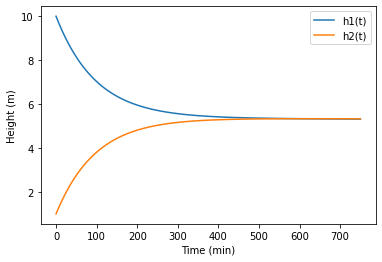

In [70]:
plt.plot(time, h1, time, h2)
plt.xlabel("Time (min)")
plt.ylabel("Height (m)")
plt.legend(["h1(t)", "h2(t)"])

In [71]:
def steady_state(p,u):

    # input
    w1 = u[0]
    # parameter
    R3 = p[1]

    # steady state value
    h = R3*w1

    return h 

In [72]:
steady_state(p,u)

5